In [7]:
import pandas as pd
from IPython.core.display import Image

In [8]:
df = pd.read_csv('../data/data.csv')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Date'].describe()

/var/folders/2b/3th3m2h118j350hwhvx48j580000gn/T/ipykernel_4893/1799491029.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Date'].describe()


count                    3232
unique                    118
top       2022-08-20 00:00:00
freq                     1203
first     2020-03-29 00:00:00
last      2022-08-20 00:00:00
Name: Date, dtype: object

In [11]:
total_death = df['Total Death'].sum()
total_death

1025722

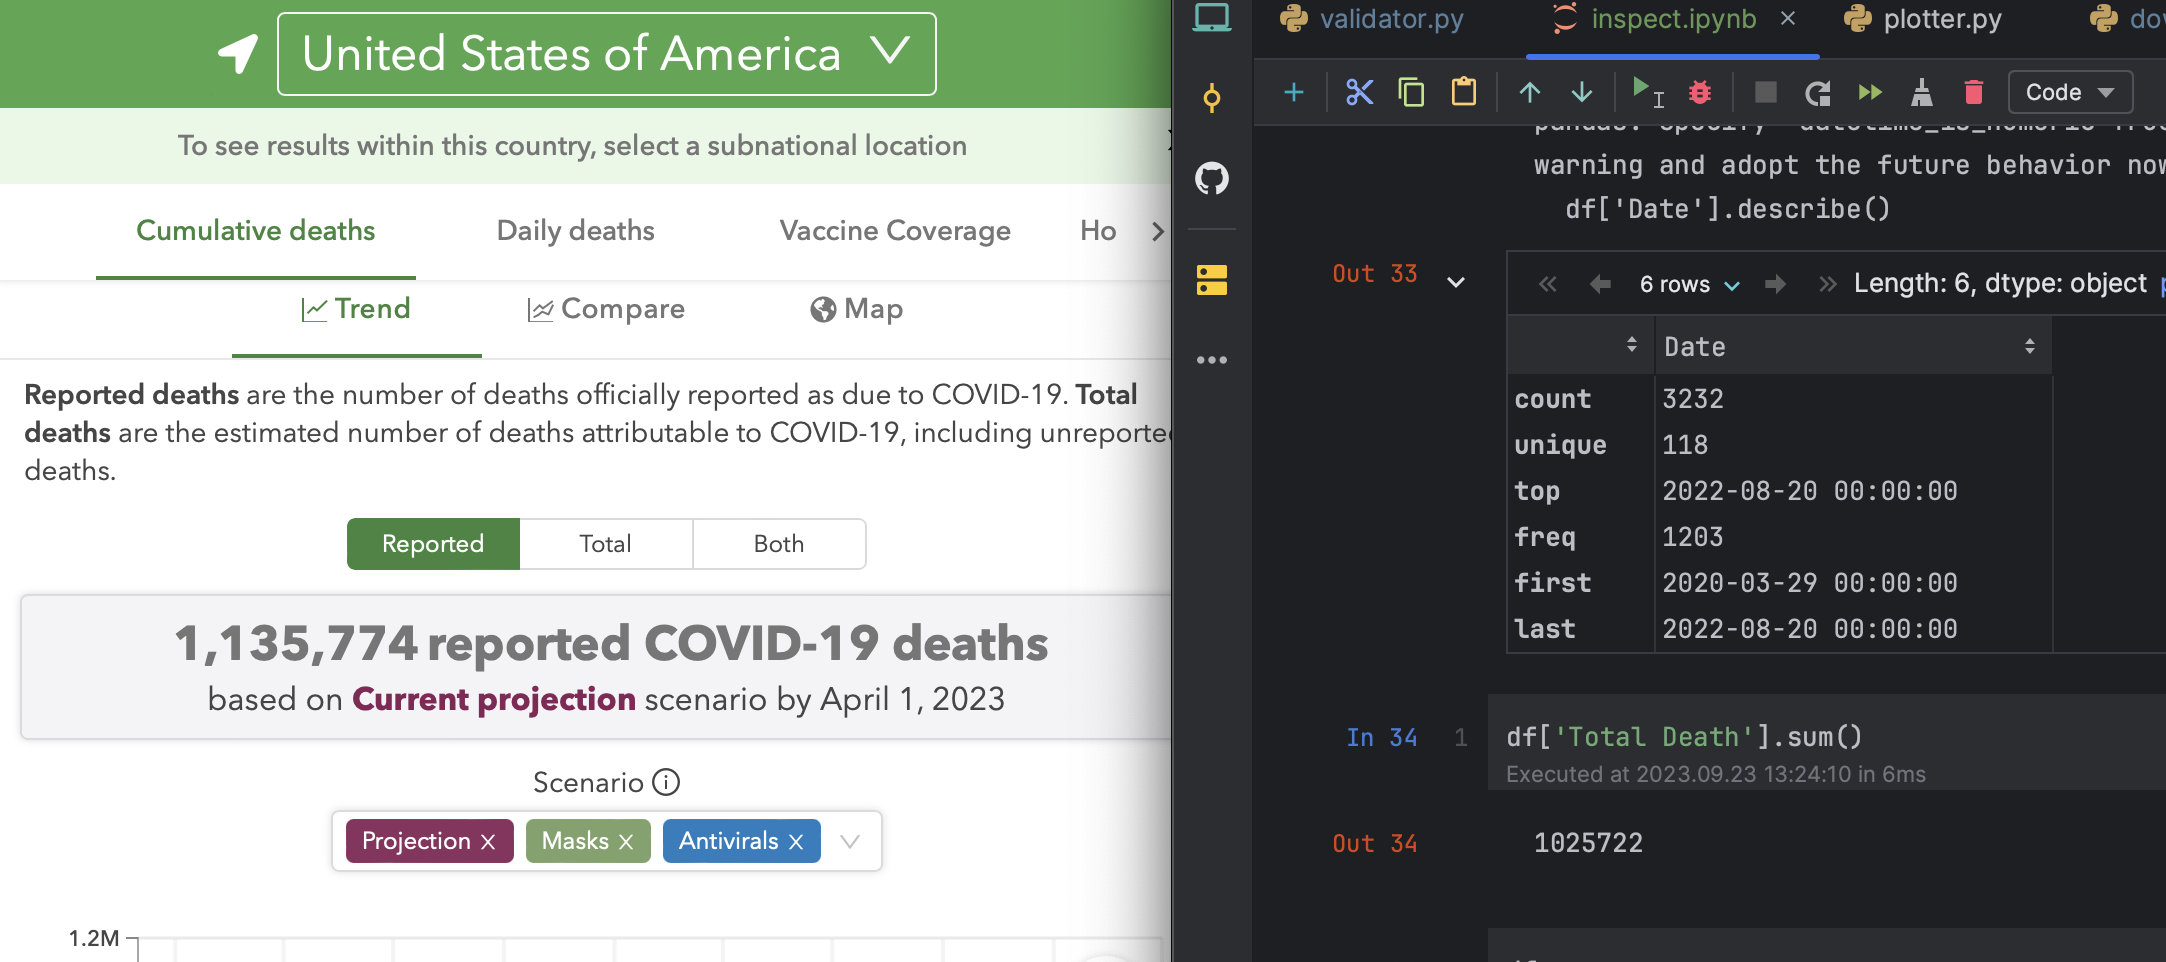

In [12]:
Image('../resource/etc/confirm_data_is_clean.png')